In [1]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier
from npl.visualize.visualize import plot_cummulative_success_rate
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

In [2]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [3]:
from npl.calculators.top_calculator import TOPCalculator
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator
 
top_calculator = TOPCalculator('TEC', 'Pt101Cu100')

n_atoms = 201
symbols = ['Cu', 'Pt']
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    top_calculator.coefficients,
    symbols, n_atoms)

top_calculator.set_coefficients(coefficients)

INFO - Loading top parameters of Pt101Cu100
INFO - Parameters obtained from reference: L. Vega Mater. Adv., 2021, 2, 6589-6602


Coef symbol_a: Cu


In [4]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(
    NeighborCountingEnvironmentCalculator(symbols), 
    symbols)

In [ ]:
from npl.optimization.basin_hopping import run_basin_hopping


steps_BH, energies_BH = [], []
for i in range(20):
    start_particle = create_start_particle(7, 2, {'Cu': 100, 'Pt': 101})
    [best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle,
                                                                        top_calculator, 
                                                                        total_energies, 
                                                                        1000, 
                                                                        5,
                                                                        local_feature_classifier=None)
    energies_BH.append(lowest_energies[-2][0])
    steps_BH.append(lowest_energies[-2][1])
    if lowest_energies[-2][0] <= min(energies_BH):
        global_minimum = best_particle

INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 1000
INFO - Hops: 5
INFO - Starting energy: 7717.1592039801
INFO - Energy after local_opt: -118.517, lowest -118.517
INFO - Lowest energy: -119.801
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 1000
INFO - Hops: 5
INFO - Starting energy: 9984.885572139301
INFO - Energy after local_opt: -117.662, lowest -117.662
INFO - Lowest energy: -119.801
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 1000
INFO - Hops: 5
INFO - Starting energy: 9334.885572139305
INFO - Energy after local_opt: -118.090, lowest -118.090
INFO - Lowest energy: -119.801
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 1000
INFO - Hops: 5
INFO - Starting energy: 8539.10447761194
INFO - Energy after local_opt: -118.945, lowest -118.945
INFO - Lowest energy: -119.801
INFO - Starting Basin Hopping simulation
INFO - Hopping attempts: 1000
INFO - Hops: 5
INFO - Starting energy: 9449.532338308456
INFO - Ener

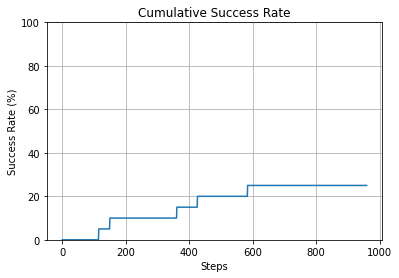

(0.0, 26.882925719625717, 0.0, 19.236)

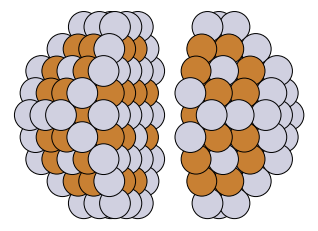

In [30]:
plot_cummulative_success_rate(energies_BH, steps_BH)
atoms = global_minimum.get_ase_atoms()
atoms.center()
atoms1 = atoms[[a.index for a in atoms if a.position[2] < atoms.get_cell()[2][2]/2 +1.0]]
atoms2 = atoms[[a.index for a in atoms if a.position[2] > atoms.get_cell()[2][2]/2 +1.0]]
l = 3
atoms1.translate(( 0., 0.,-l))
atoms2.translate(( 0., 0.,l))
atoms = atoms1 + atoms2
plot_atoms(atoms, rotation=('0x,75y,0z'))
plt.axis('off')

In [34]:
global_energy_calculator.coefficients

array([  0.,   0., -43.,   0.,   0.,   0.,   0.,   0.,   0.,  15., 208.,
       325., 325.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

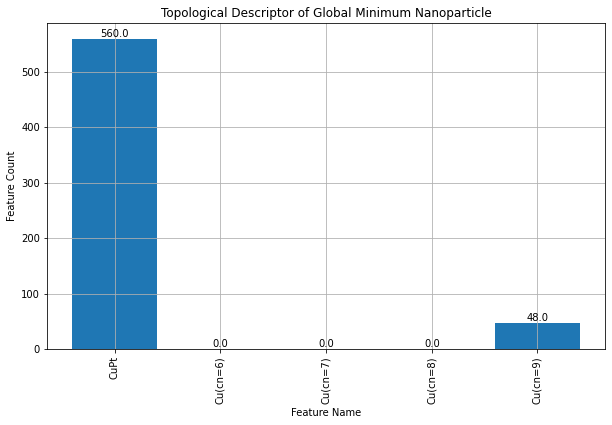

In [33]:
from npl.descriptors import TopologicalFeatureClassifier

feature_classifier = TopologicalFeatureClassifier(symbols)
feature_classifier.compute_feature_vector(global_minimum)
threshold = 1e-16
filtered_indices = [i for i, coef in enumerate(global_energy_calculator.coefficients) if abs(coef) > threshold]
feature_names = feature_classifier.get_feature_labels()

feature_vector = global_minimum.get_feature_vector(feature_classifier.get_feature_key())
filtered_feature_vector = [feature_vector[i] for i in filtered_indices]
filtered_feature_names = [feature_names[i] for i in filtered_indices]

# Plot the filtered feature vector
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_feature_names, filtered_feature_vector)
plt.xlabel('Feature Name')
plt.ylabel('Feature Count')
plt.title('Topological Descriptor of Global Minimum Nanoparticle')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate bars with their heights
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()